In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

In [3]:
# Read the metrics for each subset and incorporate the diversity information for each subsample
def read_results(dataset):

    file_path = f"../data/output/results_{dataset}.csv"
    df = pd.read_csv(file_path).drop("Unnamed: 0", axis=1)

    info_file = f"../data/subsamples/source/div_subsamples_{dataset}.csv"
    subsamples_info = pd.read_csv(info_file).drop("Unnamed: 0", axis=1)

    merged_df = pd.merge(df, subsamples_info, on="subsample").sort_values("vs")

    return merged_df

In [11]:
annomatic = read_results("annomatic")
babe = read_results("babe")
basil = read_results("basil")

results = {"ANNOMATIC": annomatic, "BABE": babe, "BASIL": basil}

In [16]:
def plot_metrics(df,name):
    colors = sns.color_palette("Set2", 5) 

    # Create a scatter plot for each metric
    for i, metric in enumerate(['mcc', 'f1', 'precision', 'recall', 'roc_auc']):
        plt.plot(df['vs'], df[metric], color=colors[i], label=metric)

        # Adding labels and title
    plt.xlabel('VS')
    plt.ylabel('Performance Metrics')
    plt.title(name)
    plt.legend(title='Metrics')

    plt.legend(title='Metrics', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

    plt.tight_layout()
    plt.show()

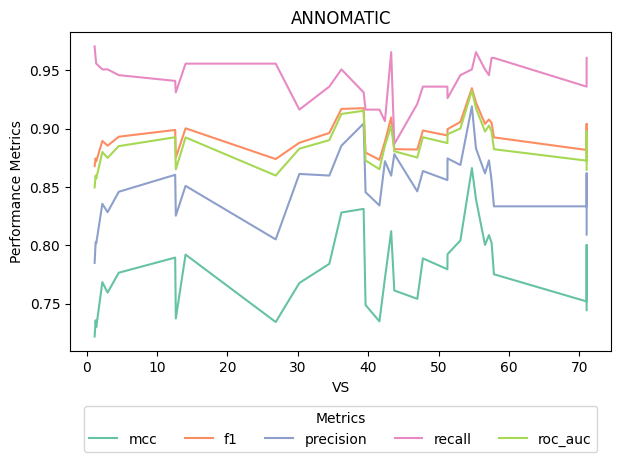

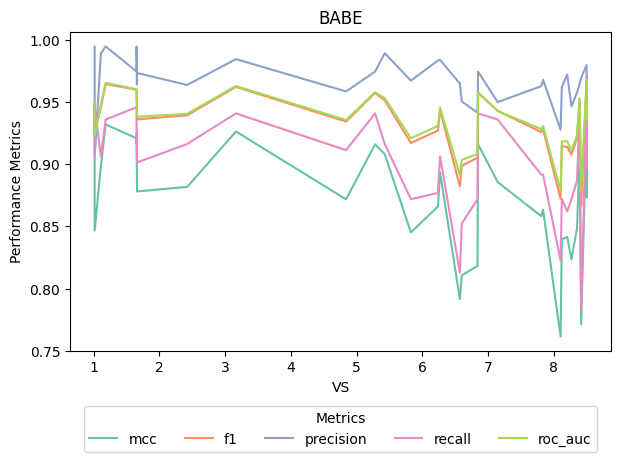

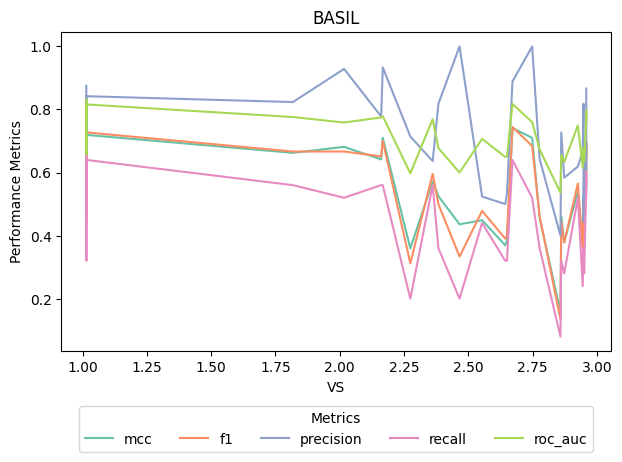

In [ ]:
for name, df in results.items():
    plot_metrics(df, name)

In [18]:
def regression_vs_metric(df, metric):
    X = df['vs']  
    y = df[metric]  

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(model.summary())

In [19]:
for name, df in results.items():
    regression_vs_metric(df, "roc_auc")

                            OLS Regression Results                            
Dep. Variable:                roc_auc   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     7.550
Date:                Wed, 04 Dec 2024   Prob (F-statistic):            0.00991
Time:                        18:01:33   Log-Likelihood:                 87.931
No. Observations:                  33   AIC:                            -171.9
Df Residuals:                      31   BIC:                            -168.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8718      0.006    145.926      0.0

### Calculate correlations


In [139]:
def calculate_correlations(df):
    results = []
    performance_metrics = ['mcc', 'f1', 'precision', 'recall', 'roc_auc']


    # Calculate Pearson and Spearman correlation and p-values for each metric
    for metric in performance_metrics:
        pearson_corr, pearson_p = pearsonr(df['vs'], df[metric])
        spearman_corr, spearman_p = spearmanr(df['vs'], df[metric])

        pearson_corr_str = f"{pearson_corr:.3f}"
        spearman_corr_str = f"{spearman_corr:.3f}"
        pearson_p_str = f"{pearson_p:.3f}"
        spearman_p_str = f"{spearman_p:.3f}"

        if pearson_p < 0.01:
            pearson_corr_str += "**"
        elif pearson_p < 0.05:
            pearson_corr_str += "*"

        if spearman_p < 0.01:
            spearman_corr_str += "**"
        elif spearman_p < 0.05:
            spearman_corr_str += "*"
        
        results.append({
            'Metric': metric,
            'Pearson Correlation': pearson_corr_str,
            'Pearson P-value': pearson_p,
            'Spearman Correlation': spearman_corr_str,
            'Spearman P-value': spearman_p
        })

    # Convert results to a DataFrame for display
    results_df = pd.DataFrame(results)

    return results_df

In [ ]:

corr_annomatic= calculate_correlations(annomatic)
corr_babe= calculate_correlations(babe)
corr_basil= calculate_correlations(basil)

print("ANNOMATIC")
print(corr_annomatic.to_string(index=False))  #

print("\nBABE")
print(corr_babe.to_string(index=False))  #

print("\nBASIL")
print(corr_basil.to_string(index=False))  

ANNOMATIC
   Metric Pearson Correlation  Pearson P-value Spearman Correlation  Spearman P-value
      mcc              0.420*         0.014859              0.443**          0.009789
       f1              0.412*         0.017290               0.427*          0.013086
precision             0.458**         0.007315               0.403*          0.020127
   recall              -0.124         0.491740               -0.010          0.957044
  roc_auc             0.443**         0.009910              0.451**          0.008398

BABE
   Metric Pearson Correlation  Pearson P-value Spearman Correlation  Spearman P-value
      mcc             -0.414*         0.016652               -0.299          0.091408
       f1             -0.414*         0.016657               -0.303          0.086747
precision              -0.270         0.127929              -0.396*          0.022685
   recall             -0.365*         0.036640               -0.272          0.125511
  roc_auc             -0.411*         